<a href="https://colab.research.google.com/github/Lavsdyc/Challenge-Telecom-X-an-lisis-de-evasi-n-de-clientes---Parte-2/blob/main/challenge_telecom_x_analisis_de_evasion_de_clientes_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desafío Telecom X – Parte 2: Predicción de Cancelación (Churn)**

**Objetivos del Desafío**

- Preparar los datos para el modelado (tratamiento, codificación, normalización).

- Realizar análisis de correlación y selección de variables.

- Entrenar dos o más modelos de clasificación.

- Evaluar el rendimiento de los modelos con métricas.

- Interpretar los resultados, incluyendo la importancia de las variables.

- Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.



In [ ]:
import pandas as pd

##**Extracción del Archivo Tratado**

In [ ]:
url = 'https://raw.githubusercontent.com/Lavsdyc/Challenge-Telecom-X-an-lisis-de-evasi-n-de-clientes---Parte-2/refs/heads/main/datos_tratados.csv'

In [ ]:
datos = pd.read_csv(url)
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.186667
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40,1.996667
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.463333
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.266667
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-lutyd,no,female,0,no,no,13,yes,no,dsl,...,no,yes,no,no,one year,no,mailed check,55.15,742.90,1.838333
7039,9992-rramn,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70,2.836667
7040,9992-ujoel,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,1.676667
7041,9993-lhieb,no,male,0,yes,yes,67,yes,no,dsl,...,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,2.261667


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


## **Eliminación de Columnas Irrelevantes**

In [ ]:
datos = datos.drop(columns=['customerID'])
datos.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [ ]:
datos.nunique().sort_values(ascending=False)

,0
Charges.Total,6530
Charges.Monthly,1585
Cuentas_Diarias,1585
tenure,73
PaymentMethod,4
StreamingMovies,3
TechSupport,3
OnlineBackup,3
DeviceProtection,3
StreamingTV,3


##**Encoding**

In [ ]:
# Convertimos la variable objetivo a binaria
datos['Churn'] = datos['Churn'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
# Identificamos variables categóricas
categorical_cols = datos.select_dtypes(include=['object']).columns
categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [ ]:
datos_encoded = pd.get_dummies(datos, columns=categorical_cols, drop_first=True)
datos_encoded.head()

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_male,Partner_yes,Dependents_yes,PhoneService_yes,...,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaperlessBilling_yes,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0,0,9,65.6,593.30,2.186667,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,0,9,59.9,542.40,1.996667,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.9,280.85,2.463333,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,1,13,98.0,1237.85,3.266667,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,1,3,83.9,267.40,2.796667,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


In [ ]:
datos_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   Charges.Monthly                        7043 non-null   float64
 4   Charges.Total                          7032 non-null   float64
 5   Cuentas_Diarias                        7043 non-null   float64
 6   gender_male                            7043 non-null   bool   
 7   Partner_yes                            7043 non-null   bool   
 8   Dependents_yes                         7043 non-null   bool   
 9   PhoneService_yes                       7043 non-null   bool   
 10  MultipleLines_no phone service         7043 non-null   bool   
 11  Mult

##**Verificación de la Proporción de Cancelación (Churn)**

In [ ]:
# Distribución de la variable objetivo
datos_encoded["Churn"].value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
# Proporciones
(datos_encoded["Churn"].value_counts(normalize=True)*100).round(2)

,proportion
Churn,
0,73.46
1,26.54


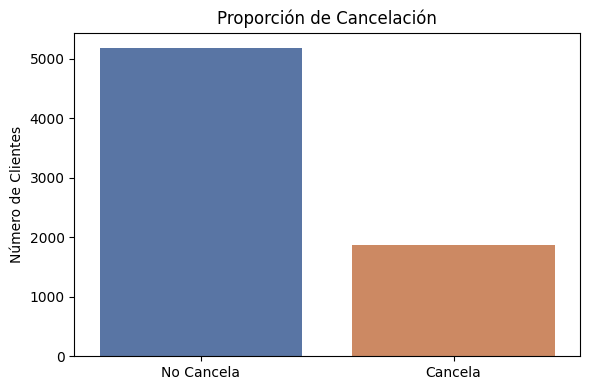

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(
    x="Churn",
    hue="Churn",
    data=datos_encoded,
    palette=["#4C72B0", "#DD8452"],
    legend=False
)

ax.set_xticks([0, 1])
ax.set_xticklabels(["No Cancela", "Cancela"])

plt.title("Proporción de Cancelación")
plt.xlabel("")
plt.ylabel("Número de Clientes")

plt.tight_layout()
plt.show()

##**Balanceo de Clases**

In [ ]:
datos_encoded = datos_encoded.dropna().copy()

In [ ]:
X = datos_encoded.drop(columns=["Churn"])
y = datos_encoded["Churn"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print("Antes de SMOTE:")
print(y_train.value_counts())

print("\nDespués de SMOTE:")
print(y_train_smote.value_counts())

Antes de SMOTE:
Churn
0    3614
1    1308
Name: count, dtype: int64

Después de SMOTE:
Churn
1    3614
0    3614
Name: count, dtype: int64


##**Análisis de Correlación**

In [ ]:
#Calculamos matriz de correlación
datos_corr = datos_encoded.copy()
corr = datos_corr.corr(numeric_only=True)
corr

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_male,Partner_yes,Dependents_yes,PhoneService_yes,...,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaperlessBilling_yes,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
Churn,1.000000,0.150541,-0.354049,0.192858,-0.199484,0.192858,-0.008545,-0.149982,-0.163128,0.011691,...,-0.227578,0.063254,-0.227578,0.060860,-0.178225,-0.301552,0.191454,-0.134687,0.301455,-0.090773
SeniorCitizen,0.150541,1.000000,0.015683,0.219874,0.102411,0.219874,-0.001819,0.016957,-0.210550,0.008392,...,-0.182519,0.105445,-0.182519,0.119842,-0.046491,-0.116205,0.156258,-0.024359,0.171322,-0.152987
tenure,-0.354049,0.015683,1.000000,0.246862,0.825880,0.246862,0.005285,0.381912,0.163386,0.007877,...,-0.037529,0.280264,-0.037529,0.285402,0.202338,0.563801,0.004823,0.232800,-0.210197,-0.232181
Charges.Monthly,0.192858,0.219874,0.246862,1.000000,0.651065,1.000000,-0.013779,0.097825,-0.112343,0.248033,...,-0.763191,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568
Charges.Total,-0.199484,0.102411,0.825880,0.651065,1.000000,0.651065,0.000048,0.319072,0.064653,0.113008,...,-0.374878,0.515709,-0.374878,0.519867,0.170569,0.358036,0.157830,0.182663,-0.060436,-0.294708
Cuentas_Diarias,0.192858,0.219874,0.246862,1.000000,0.651065,1.000000,-0.013779,0.097825,-0.112343,0.248033,...,-0.763191,0.629668,-0.763191,0.627235,0.004810,-0.073256,0.351930,0.030055,0.271117,-0.376568
gender_male,-0.008545,-0.001819,0.005285,-0.013779,0.000048,-0.013779,1.000000,-0.001379,0.010349,-0.007515,...,0.004745,-0.007124,0.004745,-0.010105,0.007755,-0.003603,-0.011902,0.001632,0.000844,0.013199
Partner_yes,-0.149982,0.016957,0.381912,0.097825,0.319072,0.097825,-0.001379,1.000000,0.452269,0.018397,...,-0.000286,0.124483,-0.000286,0.118108,0.083067,0.247334,-0.013957,0.082327,-0.083207,-0.096948
Dependents_yes,-0.163128,-0.210550,0.163386,-0.112343,0.064653,-0.112343,0.010349,0.452269,1.000000,-0.001078,...,0.138383,-0.016499,0.138383,-0.038375,0.069222,0.201699,-0.110131,0.061134,-0.149274,0.056448
PhoneService_yes,0.011691,0.008392,0.007877,0.248033,0.113008,0.248033,-0.007515,0.018397,-0.001078,1.000000,...,0.171817,-0.021383,0.171817,-0.033477,-0.003142,0.004442,0.016696,-0.006916,0.002747,-0.004463


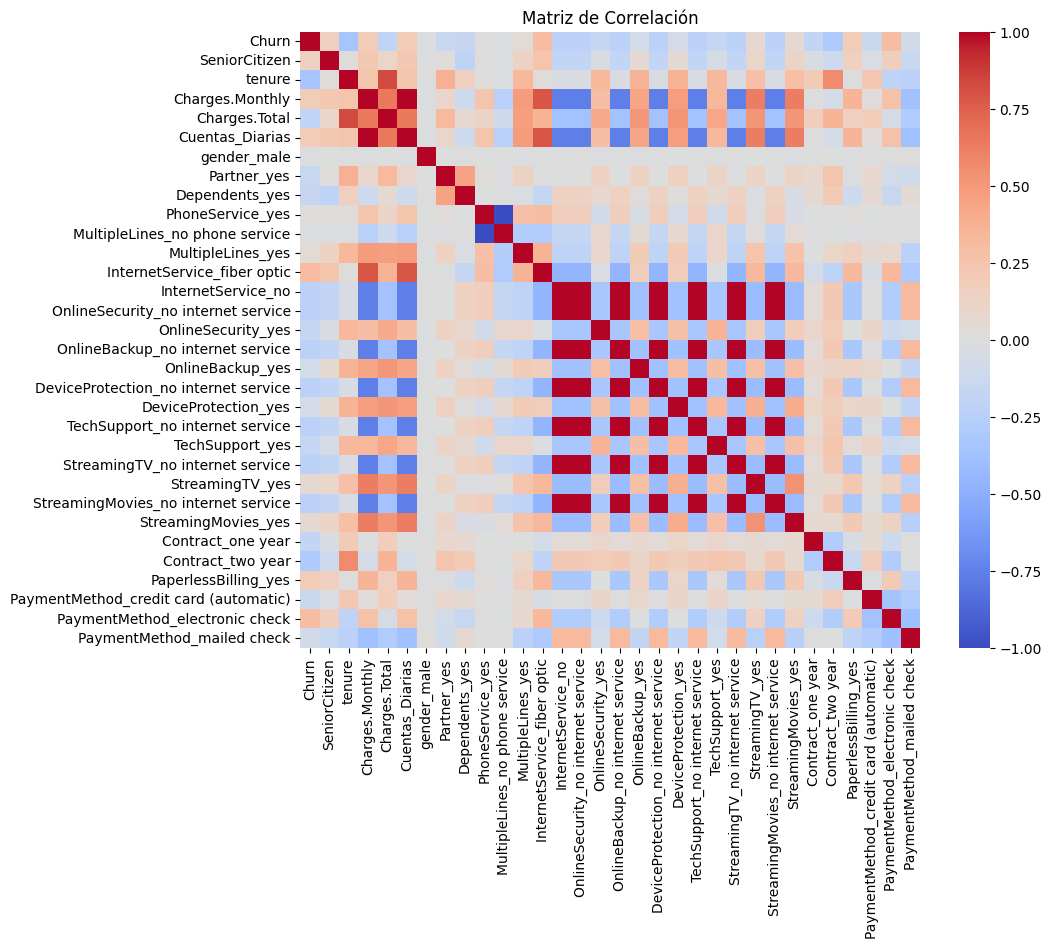

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
#correlación con Churn
corr_churn = corr["Churn"].sort_values(ascending=False)

print(corr_churn)

Churn                                    1.000000
InternetService_fiber optic              0.307463
PaymentMethod_electronic check           0.301455
Cuentas_Diarias                          0.192858
Charges.Monthly                          0.192858
PaperlessBilling_yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_yes                          0.063254
StreamingMovies_yes                      0.060860
MultipleLines_yes                        0.040033
PhoneService_yes                         0.011691
gender_male                             -0.008545
MultipleLines_no phone service          -0.011691
DeviceProtection_yes                    -0.066193
OnlineBackup_yes                        -0.082307
PaymentMethod_mailed check              -0.090773
PaymentMethod_credit card (automatic)   -0.134687
Partner_yes                             -0.149982
Dependents_yes                          -0.163128
TechSupport_yes                         -0.164716


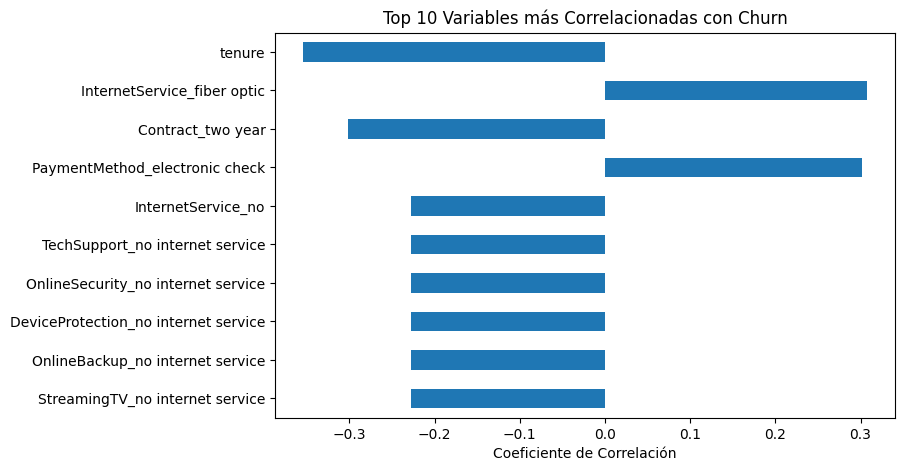

In [ ]:
import matplotlib.pyplot as plt

top_corr = corr_churn.drop("Churn").sort_values(key=abs, ascending=False).head(10)

plt.figure(figsize=(8,5))
top_corr.plot(kind="barh")
plt.title("Top 10 Variables más Correlacionadas con Churn")
plt.xlabel("Coeficiente de Correlación")
plt.gca().invert_yaxis()
plt.show()

##**Análisis Dirigido**

**Tiempo de contrato × Cancelación**

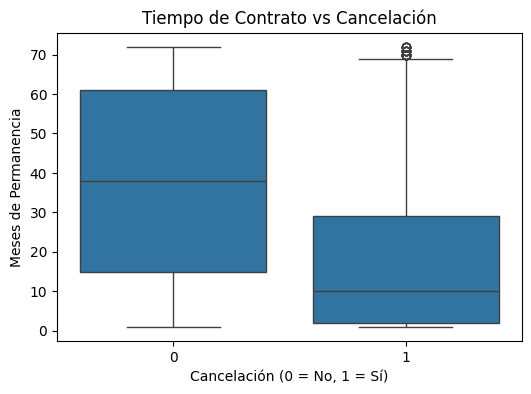

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

sns.boxplot(
    x="Churn",
    y="tenure",
    data=datos_encoded
)

plt.title("Tiempo de Contrato vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Meses de Permanencia")
plt.show()

**Gasto Total × Cancelación**

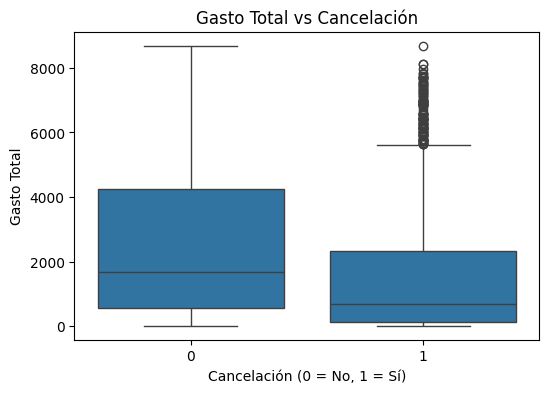

In [ ]:
plt.figure(figsize=(6,4))

sns.boxplot(
    x="Churn",
    y="Charges.Total",
    data=datos_encoded
)

plt.title("Gasto Total vs Cancelación")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Gasto Total")
plt.show()

#**Modelado Predictivo**

**Separación de Datos**

In [ ]:
print("Tamaño total:", len(X))
print("Entrenamiento:", len(X_train))
print("Prueba:", len(X_test))

Tamaño total: 7032
Entrenamiento: 4922
Prueba: 2110


##**MODELO 1: Regresión Logística**

In [ ]:
#requiere normalizar los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Ahora sí entrenamos al modelo
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(max_iter=1000)

modelo_log.fit(X_train_scaled, y_train_smote)

LogisticRegression(max_iter=1000)

##**MODELO 2: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

In [ ]:
modelo_rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_estimators=300, random_state=42)

##**Evaluación de los Modelos**

### EVALUACIÓN — REGRESIÓN LOGÍSTICA

In [ ]:
#la logística necesita el test escalado.
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Evaluando
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predicciones
y_pred_log = modelo_log.predict(X_test_scaled)

print("---------- REGRESIÓN LOGÍSTICA---------")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

---------- REGRESIÓN LOGÍSTICA---------
Accuracy: 0.7777251184834123
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1549
           1       0.58      0.61      0.60       561

    accuracy                           0.78      2110
   macro avg       0.72      0.73      0.72      2110
weighted avg       0.78      0.78      0.78      2110



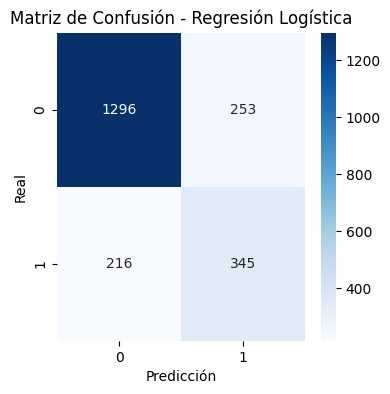

In [ ]:
##Matriz de confusion
import seaborn as sns
import matplotlib.pyplot as plt

cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(4,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### EVALUACIÓN — RANDOM FOREST

In [ ]:
y_pred_rf = modelo_rf.predict(X_test)

print("---------- RANDOM FOREST ----------")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

---------- RANDOM FOREST ----------
Accuracy: 0.7725118483412322
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1549
           1       0.57      0.58      0.58       561

    accuracy                           0.77      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.77      0.77      0.77      2110



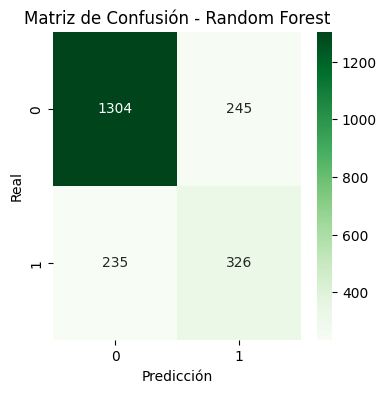

In [ ]:
#Matriz de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

Se evaluaron dos modelos predictivos: Regresión Logística y Random Forest. Ambos presentaron un desempeño similar en términos de exactitud (alrededor del 77%). Sin embargo, la Regresión Logística mostró un mejor recall en la clase de cancelación (0.61 frente a 0.58), lo cual es especialmente relevante dado que el objetivo principal es identificar clientes con riesgo de abandono. No se observan indicios claros de overfitting, ya que el rendimiento en el conjunto de prueba se mantiene consistente. Por lo tanto, la Regresión Logística se considera el modelo más adecuado para este problema.

##**Análisis de la Importancia de las Variables**

### Importancia en Regresión Logística

In [ ]:
import pandas as pd

coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": modelo_log.coef_[0]
})

coeficientes = coeficientes.sort_values(by="Coeficiente", ascending=False)

coeficientes.head(10)

,Variable,Coeficiente
11,InternetService_fiber optic,4.337560
8,PhoneService_yes,2.914935
22,StreamingTV_yes,1.611258
9,MultipleLines_no phone service,1.586290
24,StreamingMovies_yes,1.583665
3,Charges.Total,1.396400
10,MultipleLines_yes,0.885162
18,DeviceProtection_yes,0.769541
16,OnlineBackup_yes,0.695382
14,OnlineSecurity_yes,0.614126


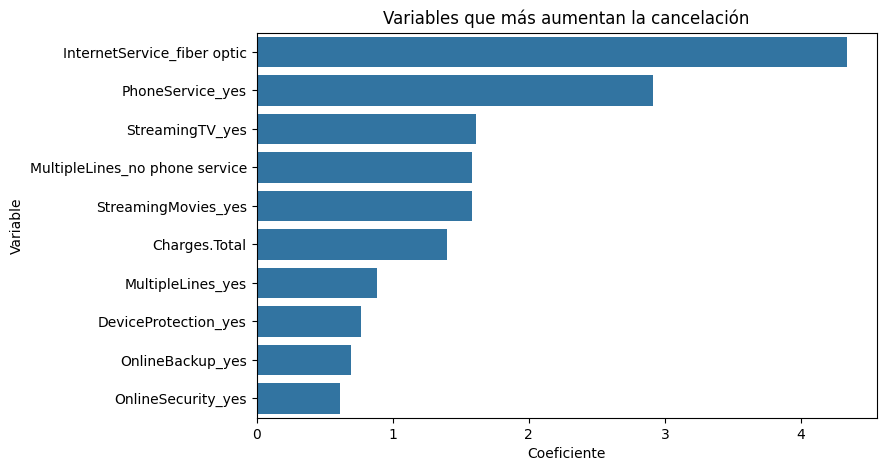

In [ ]:
#Top variables que aumentan el churn
import matplotlib.pyplot as plt
import seaborn as sns

top_pos = coeficientes.head(10)

plt.figure(figsize=(8,5))
sns.barplot(x="Coeficiente", y="Variable", data=top_pos)
plt.title("Variables que más aumentan la cancelación")
plt.show()

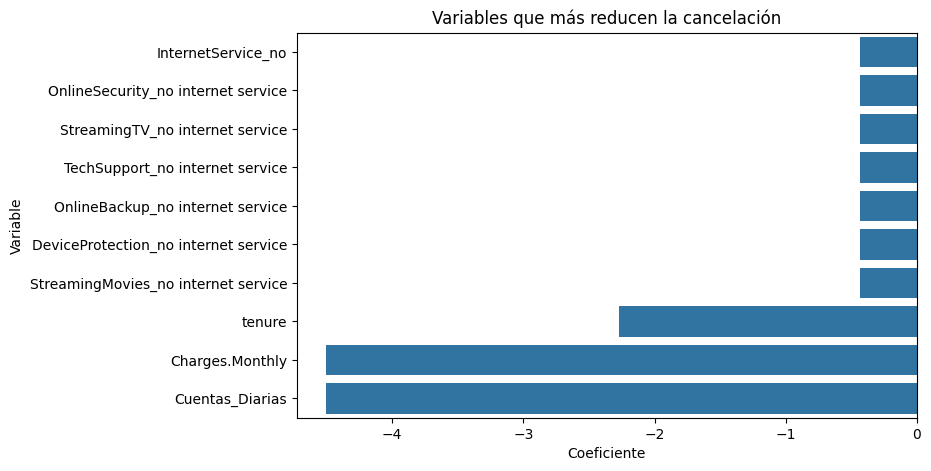

In [ ]:
#Variables que mas reducen el churn
top_neg = coeficientes.tail(10)

plt.figure(figsize=(8,5))
sns.barplot(x="Coeficiente", y="Variable", data=top_neg)
plt.title("Variables que más reducen la cancelación")
plt.show()

### Importancia en Random Forest

In [ ]:
importancias_rf = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": modelo_rf.feature_importances_
})

importancias_rf = importancias_rf.sort_values(by="Importancia", ascending=False)

importancias_rf.head(10)

,Variable,Importancia
3,Charges.Total,0.146068
1,tenure,0.145008
4,Cuentas_Diarias,0.102919
2,Charges.Monthly,0.100566
29,PaymentMethod_electronic check,0.096079
11,InternetService_fiber optic,0.059275
27,PaperlessBilling_yes,0.040443
26,Contract_two year,0.037449
5,gender_male,0.021382
25,Contract_one year,0.019746


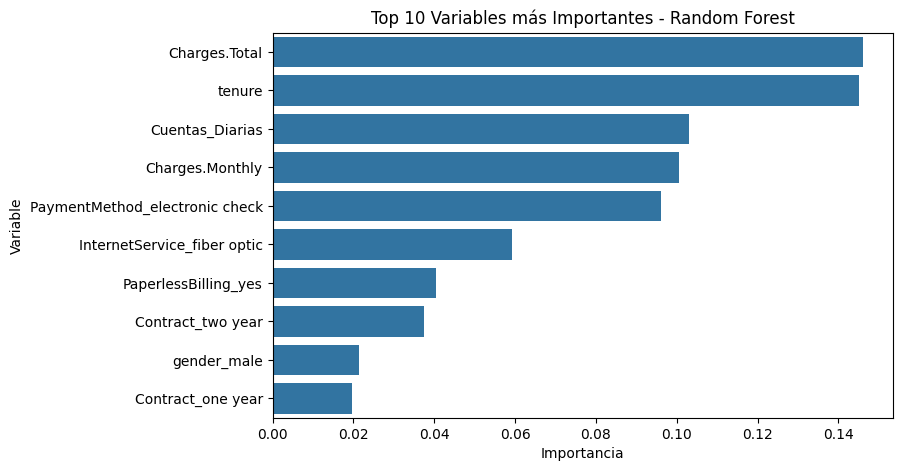

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="Importancia",
    y="Variable",
    data=importancias_rf.head(10)
)

plt.title("Top 10 Variables más Importantes - Random Forest")
plt.show()

En la Regresión Logística, los coeficientes permiten identificar la dirección y magnitud del impacto de cada variable en la probabilidad de cancelación. Las variables con coeficientes positivos aumentan el riesgo de abandono, mientras que las negativas actúan como factores protectores.

En el modelo Random Forest, la importancia de las variables se calcula en función de la reducción de impureza en los árboles. Las variables con mayor importancia son aquellas que contribuyen más a la correcta clasificación de los clientes.

Se observa coherencia entre ambos modelos en variables clave como la antigüedad del cliente y el tipo de contrato, lo que refuerza su relevancia en la predicción del churn.

#**Conclusión**

###**Conclusión General del Modelo Predictivo**

En el presente análisis se desarrollaron dos modelos predictivos para estimar la probabilidad de cancelación de clientes (churn): Regresión Logística y Random Forest. Ambos modelos mostraron un desempeño similar en términos de exactitud (alrededor del 77%), lo que indica una capacidad adecuada para clasificar correctamente a los clientes.

Sin embargo, al analizar métricas más relevantes para el problema de negocio, particularmente el recall de la clase de cancelación, la Regresión Logística presentó un mejor desempeño (0.61 frente a 0.58 en Random Forest). Dado que el objetivo principal es identificar correctamente a los clientes que están en riesgo de abandonar el servicio, la Regresión Logística se considera el modelo más adecuado en este contexto.

No se observaron indicios claros de sobreajuste (overfitting), ya que el rendimiento del modelo en el conjunto de prueba se mantiene estable y consistente.

###**Principales factores que influyen en la cancelación**

A partir del análisis de importancia de variables y los coeficientes del modelo, se identificaron los siguientes factores clave:

1. **Tiempo de permanencia (Tenure)**
La antigüedad del cliente es uno de los factores más relevantes. Clientes con menor tiempo de contrato presentan mayor probabilidad de cancelación. Esto sugiere que los primeros meses son críticos para la retención.

2. **Tipo de contrato**
Los contratos de corto plazo (mensuales) muestran mayor asociación con la cancelación, mientras que los contratos de mayor duración actúan como factor protector.

3. **Cargos mensuales**
Clientes con cargos mensuales más elevados presentan mayor probabilidad de abandonar el servicio, lo que puede indicar sensibilidad al precio.

4. **Gasto total acumulado**
Está relacionado indirectamente con la permanencia; clientes con mayor permanencia acumulan mayor gasto total y tienden a permanecer en la empresa.

Estos resultados muestran coherencia entre el análisis exploratorio, la correlación y los modelos predictivos.

###**Estrategias de Retención Propuestas**
Con base en los hallazgos, se proponen las siguientes estrategias:

###1. Programas de retención temprana:
Implementar acciones preventivas durante los primeros meses del cliente, como:

- Seguimiento personalizado

- Ofertas especiales de fidelización

- Encuestas de satisfacción tempranas

### 2. Incentivar contratos de mayor duración:
Ofrecer descuentos o beneficios exclusivos a clientes que opten por contratos anuales o bianuales.

### 3. Revisión de estructura de precios:
Analizar si los cargos mensuales altos están afectando la percepción de valor del servicio y considerar planes más flexibles o personalizados.

### 4.Segmentación basada en riesgo:
Utilizar el modelo predictivo para identificar clientes con alta probabilidad de cancelación y aplicar campañas dirigidas de retención.

###**Conclusión Final**
El análisis permitió identificar patrones claros asociados a la cancelación de clientes y validar su impacto mediante modelos predictivos. La Regresión Logística demostró ser el modelo más adecuado para este caso, destacando la importancia de variables relacionadas con la permanencia, el tipo de contrato y los cargos del servicio.

Los resultados obtenidos no solo permiten predecir la cancelación con una precisión razonable, sino que también proporcionan información estratégica para la toma de decisiones orientadas a la retención y fidelización de clientes.